In [1]:
from matplotlib import pyplot
import pandas, seaborn

def load(filename):
    df_new = pandas.read_csv(filename, sep='\t')
    df_add = pandas.DataFrame({'obs_to_exp':df_new['ratio_A1B1']/df_new['expected_AB_add'], 'expected':['additive' for v in df_new['ratio_A1B1']], 'file':[filename for v in df_new['ratio_A1B1']]})
    df_mult = pandas.DataFrame({'obs_to_exp':df_new['ratio_A1B1']/df_new['expected_AB_mult'], 'expected':['multiplicative' for v in df_new['ratio_A1B1']], 'file':[filename for v in df_new['ratio_A1B1']]})
    return pandas.concat([df_mult, df_add], ignore_index=True)


In [2]:
df1 = pandas.concat([load('sum_actual.txt'), load('sum_shuffleAB.txt'), load('sum_bgfreqsepgroups.txt')], ignore_index=True)
df2 = pandas.concat([load('dom_actual.txt'), load('dom_shuffleAB.txt'), load('dom_bgfreqsepgroups.txt')], ignore_index=True)
df3 = pandas.concat([load('rec_actual.txt'), load('rec_samegroup.txt'), load('rec_bgfreqsepgroups.txt')], ignore_index=True)

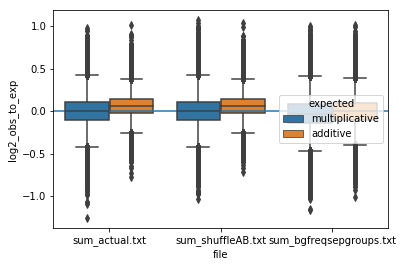

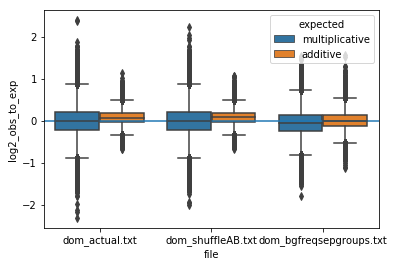

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


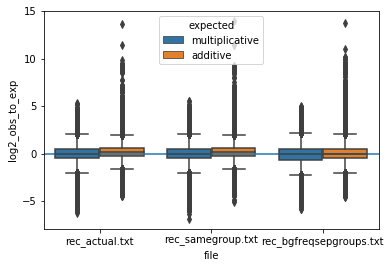

In [8]:
import numpy
def plot(df):
    df['log2_obs_to_exp'] = numpy.log2(df['obs_to_exp'])
    seaborn.boxplot(y='log2_obs_to_exp', hue='expected', x='file', data=df)
    
    pyplot.gca().axhline(0)
plot(df1)
pyplot.savefig('sum.pdf')
pyplot.show()
plot(df2)
pyplot.savefig('dom.pdf')
pyplot.show()
plot(df3)
pyplot.savefig('rec.pdf')
pyplot.show()



In [4]:
df1_2 = pandas.concat([load('sum_actual.txt'), load('dom_actual.txt'), load('rec_actual.txt')], ignore_index=True)
df2_2 = pandas.concat([load('sum_shuffleAB.txt'), load('dom_shuffleAB.txt'), load('rec_samegroup.txt')], ignore_index=True)
df3_2 = pandas.concat([load('sum_bgfreqsepgroups.txt'), load('dom_bgfreqsepgroups.txt'), load('rec_bgfreqsepgroups.txt')], ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


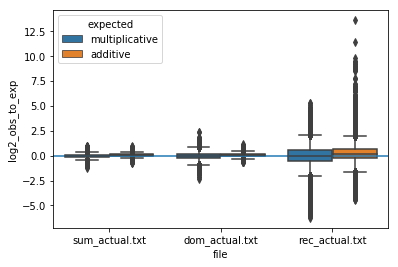

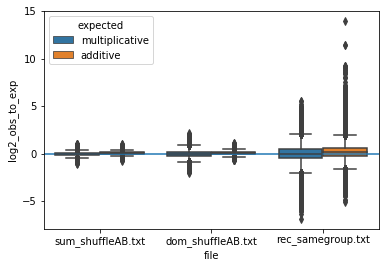

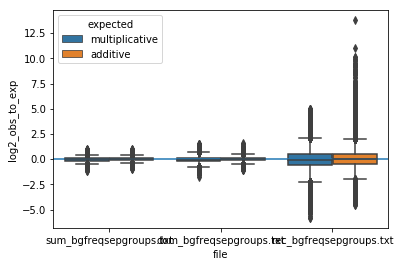

In [5]:
plot(df1_2)
pyplot.show()
plot(df2_2)
pyplot.show()
plot(df3_2)
pyplot.show()

In [6]:
df1.head()

,obs_to_exp,expected,file,log2_obs_to_exp
0,0.846871,multiplicative,sum_actual.txt,-0.239785
1,0.862752,multiplicative,sum_actual.txt,-0.212982
2,0.899951,multiplicative,sum_actual.txt,-0.152081
3,0.925863,multiplicative,sum_actual.txt,-0.111129
4,0.818221,multiplicative,sum_actual.txt,-0.289438


In [7]:
def loadOR(filename):
    df_new = pandas.read_csv(filename, sep='\t')
    df_add = pandas.DataFrame({'OR':df_new['OR_B'], 'gene':['B' for v in df_new['ratio_A1B1']], 'file':[filename for v in df_new['ratio_A1B1']]})
    #df_mult = pandas.DataFrame({'OR':df_new['OR_A'], 'gene':['A' for v in df_new['ratio_A1B1']], 'file':[filename for v in df_new['ratio_A1B1']]})
    #return pandas.concat([df_add, df_mult], ignore_index=True)
    return df_add

def plotOR_A(df):
    seaborn.boxplot(y='OR', hue='gene', x='file', data=df)
    pyplot.gca().axhline(1)
    pyplot.ylim(0.8, 1.3)
plotOR(pandas.concat([loadOR('sum_actual.txt'), loadOR('sum_shuffleAB.txt'), loadOR('sum_bgfreqsepgroups.txt')], ignore_index=True))
pyplot.show()

NameError: name 'plotOR' is not defined

In [9]:
def loadOR(filename):
    df_new = pandas.read_csv(filename, sep='\t')
    #df_add = pandas.DataFrame({'OR':df_new['OR_B'], 'gene':['B' for v in df_new['ratio_A1B1']], 'file':[filename for v in df_new['ratio_A1B1']]})
    df_mult = pandas.DataFrame({'OR':df_new['OR_A'], 'gene':['A' for v in df_new['ratio_A1B1']], 'file':[filename for v in df_new['ratio_A1B1']]})
    #return pandas.concat([df_add, df_mult], ignore_index=True)
    return df_mult

def plotOR_A(df):
    seaborn.boxplot(y='OR', hue='gene', x='file', data=df)
    pyplot.gca().axhline(1)
    pyplot.ylim(0.8, 1.3)
plotOR(pandas.concat([loadOR('sum_actual.txt'), loadOR('sum_shuffleAB.txt'), loadOR('sum_bgfreqsepgroups.txt')], ignore_index=True))
pyplot.show()

NameError: name 'plotOR' is not defined

In [10]:
dfor1 = pandas.concat([loadOR('sum_actual.txt'), loadOR('sum_shuffleAB.txt'), loadOR('sum_bgfreqsepgroups.txt')], ignore_index=True)
print([dfor1.loc[dfor1['file']==f, 'OR'].median() for f in dfor1['file'].unique()])

[3.3793278284799997, 3.3793278284799997, 1.77413169384]


In [11]:
1.77413169384*2

3.54826338768

In [12]:
dfor2 = pandas.concat([loadOR('dom_actual.txt'), loadOR('dom_shuffleAB.txt'), loadOR('dom_bgfreqsepgroups.txt')], ignore_index=True)
print([dfor2.loc[dfor2['file']==f, 'OR'].median() for f in dfor2['file'].unique()])

[5.60938037496, 5.60938037496, 2.44662678631]


In [13]:
dfor3 = pandas.concat([loadOR('rec_actual.txt'), loadOR('rec_samegroup.txt'), loadOR('rec_bgfreqsepgroups.txt')], ignore_index=True)
print([dfor3.loc[dfor3['file']==f, 'OR'].median() for f in dfor3['file'].unique()])

[4.65882352941, 4.65882352941, 3.0450456959099994]


In [14]:
print([df1.loc[df1['file']==f, 'log2_obs_to_exp'].var() for f in df1['file'].unique()])
from scipy import stats
threesplit = [df1.loc[df1['file']==f, 'log2_obs_to_exp'] for f in df1['file'].unique()]
print(stats.levene(threesplit[0], threesplit[1]))
print(stats.levene(threesplit[0], threesplit[2]))
print(stats.levene(threesplit[1], threesplit[2]))

[0.02286413792645695, 0.022978360476894884, 0.02757484208802161]
LeveneResult(statistic=4.181479402545153, pvalue=0.040868244001063626)
LeveneResult(statistic=4340.053343627853, pvalue=0.0)
LeveneResult(statistic=4079.8964009976507, pvalue=0.0)


In [15]:
threesplit = [df2.loc[df2['file']==f, 'log2_obs_to_exp'] for f in df2['file'].unique()]
print(stats.levene(threesplit[0], threesplit[1]))
print(stats.levene(threesplit[0], threesplit[2]))
print(stats.levene(threesplit[1], threesplit[2]))

LeveneResult(statistic=4.031286607690122, pvalue=0.044664105357735906)
LeveneResult(statistic=36.69966710152321, pvalue=1.3784645076200544e-09)
LeveneResult(statistic=15.58455254087744, pvalue=7.890132217188811e-05)


In [16]:
threesplit = [df3.loc[df3['file']==f, 'log2_obs_to_exp'] for f in df3['file'].unique()]
print(stats.levene(threesplit[0], threesplit[1]))
print(stats.levene(threesplit[0], threesplit[2]))
print(stats.levene(threesplit[1], threesplit[2]))

LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [17]:
df1_3 = pandas.concat([load('sum_actual.txt'), load('sum_shuffleAB.txt'), load('sum_SEsum_bgfreqsepgroupsv2.txt')], ignore_index=True)
df2_3 = pandas.concat([load('dom_SEsum_actual.txt'), load('dom_SEsum_samegroup.txt'), load('dom_SEsum_bgfreqsepgroupsv2.txt')], ignore_index=True)
df3_3 = pandas.concat([load('rec_SEsum_actual.txt'), load('rec_SEsum_samegroup.txt'), load('rec_SEsum_bgfreqsepgroupsv2.txt')], ignore_index=True)

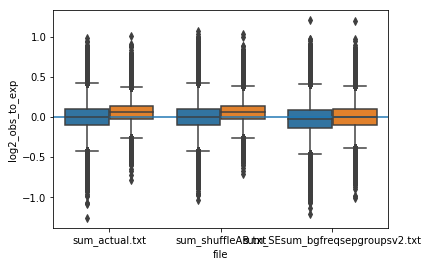

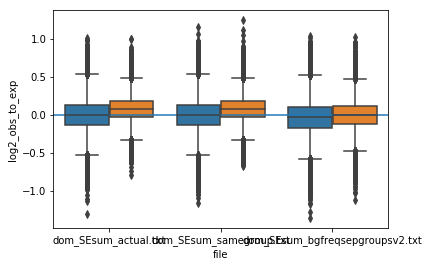

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


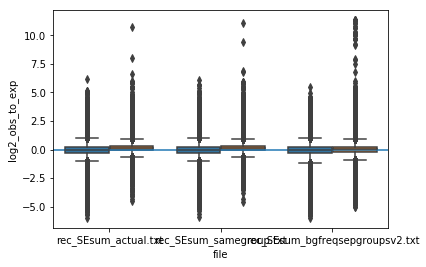

In [18]:
plot(df1_3)
pyplot.gca().get_legend().remove()
pyplot.savefig('sum_SEsum.pdf')
pyplot.show()
plot(df2_3)
pyplot.gca().get_legend().remove()
pyplot.savefig('dom_SEsum.pdf')
pyplot.show()
plot(df3_3)
pyplot.gca().get_legend().remove()
pyplot.show()

In [19]:
dfor1 = pandas.concat([loadOR('sum_actual.txt'), loadOR('sum_shuffleAB.txt'), loadOR('sum_SEsum_bgfreqsepgroupsv2.txt')], ignore_index=True)
print([dfor1.loc[dfor1['file']==f, 'OR'].var() for f in dfor1['file'].unique()])

[5.275811034725435e-05, 5.213815634500285e-05, 1.5226723322736052e-05]


In [20]:
print([df1_3.loc[(df1_3['file']==f)&(df1_3['expected']=='additive'), 'log2_obs_to_exp'].var() for f in df1_3['file'].unique()])
threesplit = [df1_3.loc[(df1_3['file']==f)&(df1_3['expected']=='additive'), 'log2_obs_to_exp'] for f in df1_3['file'].unique()]
print(stats.levene(threesplit[0], threesplit[1]))
print(stats.levene(threesplit[0], threesplit[2]))
print(stats.levene(threesplit[1], threesplit[2]))
print([df1_3.loc[(df1_3['file']==f)&(df1_3['expected']=='multiplicative'), 'log2_obs_to_exp'].var() for f in df1_3['file'].unique()])
threesplit = [df1_3.loc[(df1_3['file']==f)&(df1_3['expected']=='multiplicative'), 'log2_obs_to_exp'] for f in df1_3['file'].unique()]
print(stats.levene(threesplit[0], threesplit[1]))
print(stats.levene(threesplit[0], threesplit[2]))
print(stats.levene(threesplit[1], threesplit[2]))
# conclusion: the samegroup randomisation is close in both OR and variance (P=0.04 levene test) but the background-frequency separate grous is not (P<1e-200 levene test) 

[0.016141630576632433, 0.016249471467874338, 0.023265867916702012]
LeveneResult(statistic=4.106732219371381, pvalue=0.04271328671066416)
LeveneResult(statistic=7063.9669718116575, pvalue=0.0)
LeveneResult(statistic=6749.416314895538, pvalue=0.0)
[0.027673684834020572, 0.027806537369045814, 0.030186231120931894]
LeveneResult(statistic=1.742355381351359, pvalue=0.1868411981849789)
LeveneResult(statistic=391.3731486169045, pvalue=4.4529808312404045e-87)
LeveneResult(statistic=341.38955444713105, pvalue=3.348689521351939e-76)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


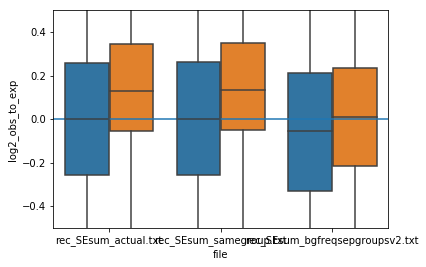

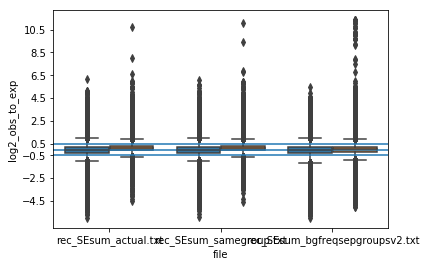

In [21]:
plot(df3_3)
pyplot.ylim(-0.5, 0.5)
pyplot.gca().get_legend().remove()
pyplot.savefig('rec_SEsum_centre.pdf')
pyplot.show()
plot(df3_3)
pyplot.gca().get_legend().remove()
pyplot.gca().axhline(0.5)
pyplot.gca().axhline(-0.5)
pyplot.yticks([-4.5, -2.5, -0.5, 0.5, 2.5, 4.5, 6.5, 8.5, 10.5])
pyplot.savefig('rec_SEsum_full.pdf')
pyplot.savefig('rec_SEsum_full.png')
pyplot.show()

In [22]:
def plot2(df):
    df['log2_obs_to_exp'] = numpy.log2(df['obs_to_exp'])
    seaborn.boxplot(y='log2_obs_to_exp', hue='expected', x='file', data=df, whis=[1, 99])
    pyplot.gca().axhline(0)
    pyplot.gca().get_legend().remove()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log2
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


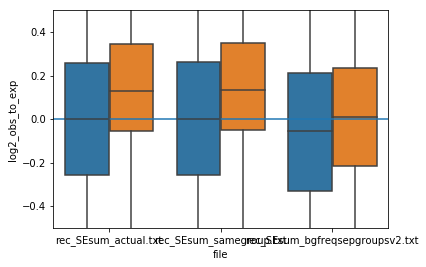

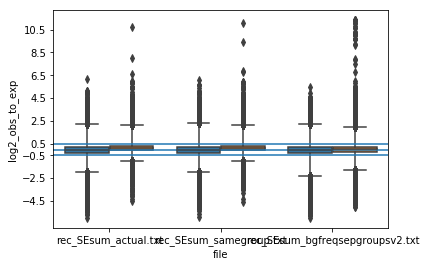

In [23]:
plot2(df3_3)
pyplot.ylim(-0.5, 0.5)
pyplot.savefig('rec_SEsum_centre.pdf')
pyplot.show()
plot2(df3_3)
pyplot.gca().axhline(0.5)
pyplot.gca().axhline(-0.5)
pyplot.yticks([-4.5, -2.5, -0.5, 0.5, 2.5, 4.5, 6.5, 8.5, 10.5])
pyplot.savefig('rec_SEsum_full.pdf')
pyplot.show()

In [ ]:
df1_3.shape

In [ ]:
1687176*0.02

In [ ]:
import numpy
from scipy import stats
d = df2_3
d['log2_obs_to_exp'] = numpy.log2(d['obs_to_exp'])
print([d.loc[(df1_3['file']==f)&(d['expected']=='additive'), 'log2_obs_to_exp'].var() for f in df1_3['file'].unique()])
threesplit = [d.loc[(df1_3['file']==f)&(d['expected']=='additive'), 'log2_obs_to_exp'] for f in df1_3['file'].unique()]
print(stats.levene(threesplit[0], threesplit[1]))
print(stats.levene(threesplit[0], threesplit[2]))
print(stats.levene(threesplit[1], threesplit[2]))
print([d.loc[(df1_3['file']==f)&(d['expected']=='multiplicative'), 'log2_obs_to_exp'].var() for f in df1_3['file'].unique()])
threesplit = [d.loc[(df1_3['file']==f)&(d['expected']=='multiplicative'), 'log2_obs_to_exp'] for f in df1_3['file'].unique()]
print(stats.levene(threesplit[0], threesplit[1]))
print(stats.levene(threesplit[0], threesplit[2]))
print(stats.levene(threesplit[1], threesplit[2]))
# conclusion: the samegroup randomisation is close in both OR and variance (P=0.04 levene test) but the background-frequency separate grous is not (P<1e-200 levene test) 

In [ ]:
import numpy
from scipy import stats
d = df3_3
d = d.dropna()
d['log2_obs_to_exp'] = numpy.log2(d['obs_to_exp'])
print([d.loc[(df1_3['file']==f)&(d['expected']=='additive'), 'log2_obs_to_exp'].var() for f in df1_3['file'].unique()])
threesplit = [d.loc[(df1_3['file']==f)&(d['expected']=='additive'), 'log2_obs_to_exp'] for f in df1_3['file'].unique()]
print(stats.levene(threesplit[0], threesplit[1]))
print(stats.levene(threesplit[0], threesplit[2]))
print(stats.levene(threesplit[1], threesplit[2]))
print([d.loc[(df1_3['file']==f)&(d['expected']=='multiplicative'), 'log2_obs_to_exp'].var() for f in df1_3['file'].unique()])
threesplit = [d.loc[(df1_3['file']==f)&(d['expected']=='multiplicative'), 'log2_obs_to_exp'] for f in df1_3['file'].unique()]
print(stats.levene(threesplit[0], threesplit[1]))
print(stats.levene(threesplit[0], threesplit[2]))
print(stats.levene(threesplit[1], threesplit[2]))
# conclusion: the samegroup randomisation is close in both OR and variance (P=0.04 levene test) but the background-frequency separate grous is not (P<1e-200 levene test) 